# Multivariate Linear and Polynomial Models to Predict Home Price

Are you getting a fair value for your home? Let's deep-dive into this question by working with a real-life data set to fit models to predict home price, train them, see how they perform in the real world by applying them to test sets, plot and evaluate them, and take a look at the problem of overfitting. We'll use realty data that includes home sale prices from May 2014 to May 2015 alongside important variables like living square footage, lot square footage, number of bedrooms and bathrooms, grade, condition, waterfront status, and more for King County, WA in the Seattle-Tacoma-Bellevue metro area. 

**Part 1**: Wrangling and exploring the data, including .drop, .replace (missing values with means), custom histograms and box plots
<br>**Part 2**: Linear regression models, including regression and residual plots, fitting models using LinearRegression(), making predictions, and plotting fitted vs actual values 
<br>**Part 3**: Polynomial regression on 1 variable, including fitting models using polyfit and poly1d numpy functions, making predictions, defining a plot function, and plotting fitted vs actual values
<br>**Part 4**: Multivariate polynomial regression, including fitting models using PolynomialFeatures and .fit_transform from scikit learn, creating a data pipeline using Pipeline() from scikit learn to scale, transform, and fit a model simultaneously
<br>**Part 5**: In-sample evaluation of simple linear, multiple linear, and multivariate polynomial models comparing R-squared and MSE
<br>**Part 6**: Training linear and polynomial models (out-of-sample evaluation) to see how models could perform in the real world, including splitting data into training and test sets using train_test_split, fitting and scoring models, prediting values, and plotting fitted vs actual values for training and test sets
<br>**Part 7**: Looking at the problem of overfitting by fitting a 9th order polynomial, creating, training, and scoring the model, defining a plot function, plotting predicted function on test data vs actual test and training data, and plotting an R-squared test to opimize polynomial degree

Our end-to-end exploration, analysis, and modeling will cover a lot of ground, including important scikit learn packages and libraries. Let's dive in. 

## Part 1: Wrangling and Exploring the Data

In [450]:
# Import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
import numpy as np
import scipy.stats.distributions as dist
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [451]:
# Read in data
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
home=pd.read_csv(file_name)

In [452]:
# Check first few rows
pd.set_option("display.max_columns", 100)
home.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [453]:
# Check last few rows
home.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [454]:
# Check column headings
home.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Let's digest the variable definitions:

**id**: home ID
<br>**date**: date home was sold
<br>**price**: home price (our prediction target)
<br>**bedrooms**: number of bedrooms
<br>**bathrooms**: number of bathrooms
<br>**sqft_living**: square footage of home
<br>**sqft_lot**: square footage of lot
<br>**floors**: number of floors
<br>**waterfront**: waterfront status 
<br>**view**: has been viewed
<br>**condition**: overall condition
<br>**grade**: overall grade given to home by the county
<br>**sqft_above**: square footage above basement 
<br>**sqft_basement**: square footage of basement only
<br>**yr_built**: year built
<br>**yr_renovated**: year renovated
<br>**zipcode**: zip code
<br>**lat**: latitude coordinate
<br>**long**: longitude coordinate
<br>**sqft_living15**: living room area in 2015 (with renovations)
<br>**sqft_lot15**: lot area in 2015 (with renovations)

In [455]:
# Check the dimensions of the dataframe, this one has 21,613 observations and 22 variables
home.shape

(21613, 22)

In [456]:
# Check number of null values by variable. We use .to_frame to convert to dataframe so it looks prettier
home.isnull().sum().to_frame()

,0
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


In [457]:
# Bedrooms has some missing values, let's replace them with the mean number of bedrooms
mean=home['bedrooms'].mean()
home['bedrooms'].replace(np.nan,mean, inplace=True)

In [458]:
# Bathrooms has some missing values, let's replace them with the mean number of bathrooms
mean=home['bathrooms'].mean()
home['bathrooms'].replace(np.nan,mean, inplace=True)

In [459]:
# Drop column "Unnamed: 0" as it isn't relevant
home.drop("Unnamed: 0", axis=1, inplace=True)

In [460]:
# Drop column "id" as it isn't relevant
home.drop("id", axis=1,inplace=True)

In [461]:
# We're going to be using seaborn for plots, set style to darkgrid
sns.set_style("darkgrid")
sns.set(style='ticks', palette='Set2')

Looking at the summary statistics, we see that median home price is 450,000 dollars. There's some indication of a right-skew with a higher mean home price of 540,000 dollars likely lifted by higher end outliers. 

In [462]:
# Summary statistics of entire dataframe
home.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The histogram of house prices is unimodal with a right skew and a mean of roughly $500,000 (the exact mean $540,081 is in the table above)

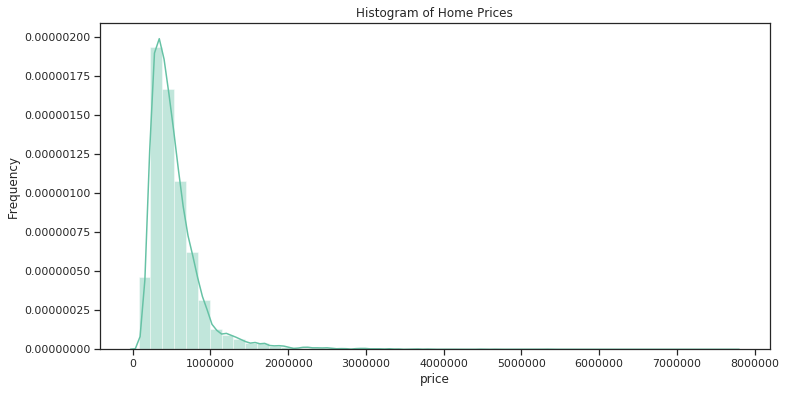

In [463]:
# Distribution of house prices
plt.figure(figsize=(12, 6))
sns.distplot(home.price)
plt.title("Histogram of Home Prices")
plt.ylabel("Frequency")
plt.show()

The histogram of home square footage is unimodal with a right skew and a mean of roughly 2,000 square feet (the exact mean is 2,080 square feet).

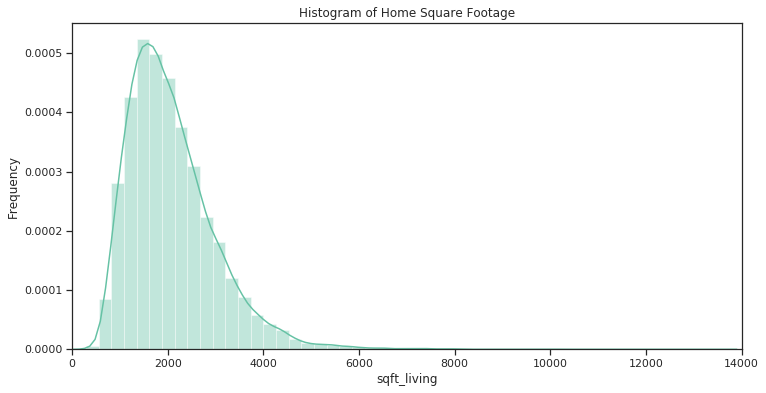

In [464]:
# Distribution of home square footage
plt.figure(figsize=(12, 6))
sns.distplot(home.sqft_living)
plt.title("Histogram of Home Square Footage")
plt.ylabel("Frequency")
plt.xlim(0,14000)
plt.show()

A box plot of price stratified by square footage and waterfront status shows that median price, spread (IQR range), and number of outliers increase as square footage increases. Additionally, prices for waterfront homes have higher medians and spreads. 

Text(0.5, 1.0, 'Box Plot of Price Stratified by Bedrooms and Waterfront Status')

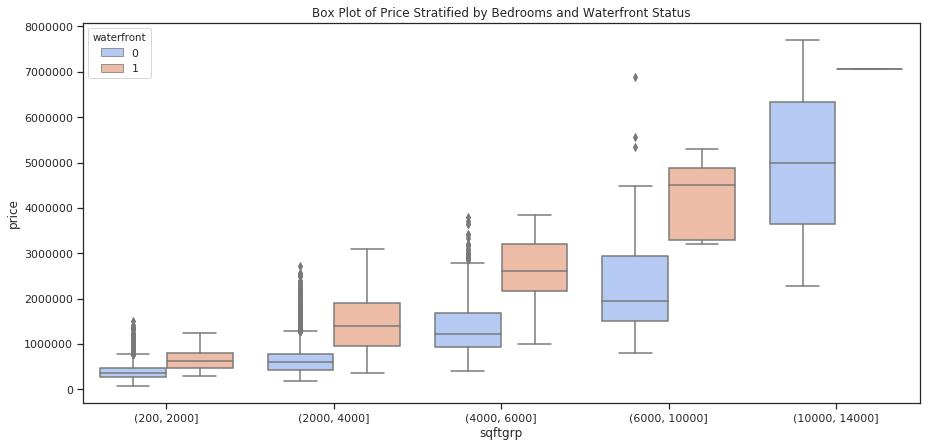

In [465]:
# Box plot of price stratified by both square footage and waterfront status. We create square footage subranges using pd.cut
home["sqftgrp"] = pd.cut(home.sqft_living, [200, 2000, 4000, 6000, 10000, 14000])
plt.figure(figsize=(15, 7))
sns.boxplot(x="sqftgrp", y="price", hue="waterfront", data=home, palette = "coolwarm")
plt.title("Box Plot of Price Stratified by Bedrooms and Waterfront Status")

A box plot of price stratified by number of bedrooms and waterfront status shows that median price increases gradually with number of bedrooms while the increase spread (IQR range) and number of outliers is even more dramatic. As we saw above, prices for waterfront homes have higher medians and spreads. 

Text(0.5, 1.0, 'Box Plot of Price Stratified by Bedrooms and Waterfront Status')

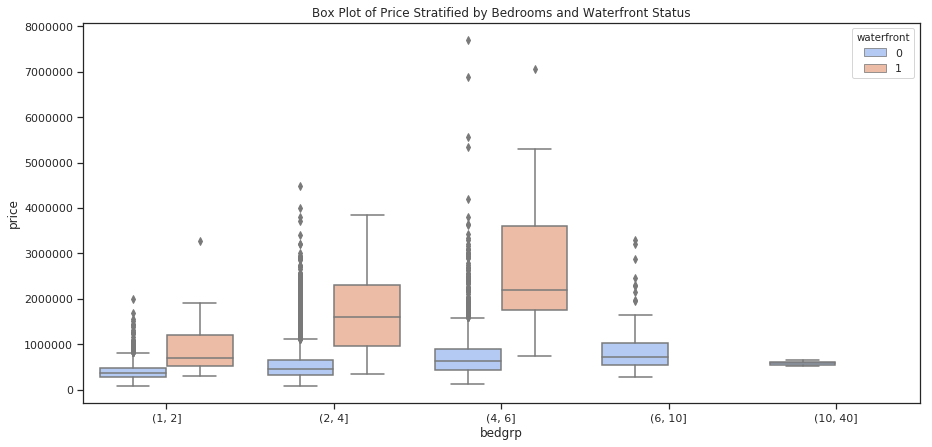

In [466]:
# Box plot of price stratified by both bedrooms and waterfront status. We create bedroom subranges using pd.cut
home["bedgrp"] = pd.cut(home.bedrooms, [1, 2, 4, 6, 10, 40])
plt.figure(figsize=(15, 7))
sns.boxplot(x="bedgrp", y="price", hue="waterfront", data=home, palette = "coolwarm")
plt.title("Box Plot of Price Stratified by Bedrooms and Waterfront Status")

Similarly, a box plot of price stratified by number of bathrooms and waterfront status shows that median price increases gradually with number of bedrooms while the increase spread (IQR range) and number of outliers is even more dramatic. As we saw above, prices for waterfront homes have higher medians and spreads. 

Text(0.5, 1.0, 'Box Plot of Price Stratified by Bathrooms and Waterfront Status')

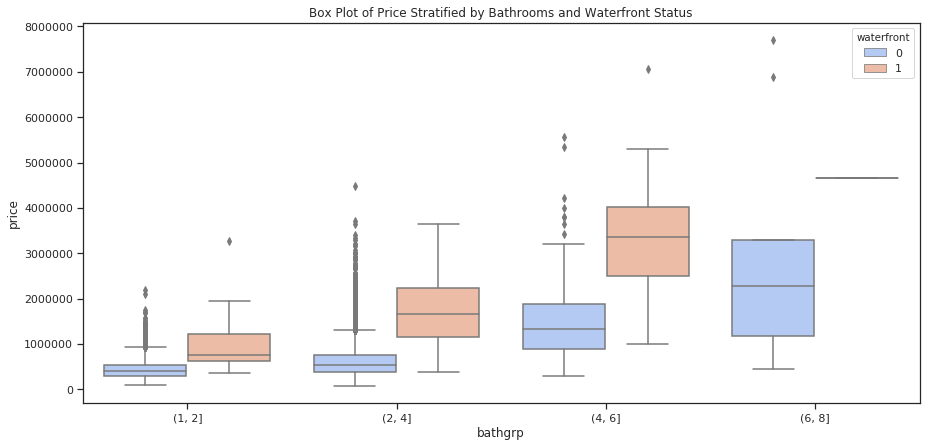

In [467]:
# Box plot of price stratified by both bathrooms and waterfront status. We create bathroom subranges using pd.cut
home["bathgrp"] = pd.cut(home.bathrooms, [1, 2, 4, 6, 8])
plt.figure(figsize=(15, 7))
sns.boxplot(x="bathgrp", y="price", hue="waterfront", data=home, palette = "coolwarm")
plt.title("Box Plot of Price Stratified by Bathrooms and Waterfront Status")

## Part 2: Linear Regression Models 

Based on the Pearson correlation of price to other variables, price is most highly correlated with several square footage variables (home square footage, square footage above the basement, square footage in 2015 after renovations), overall grade given by the county, and number of bathrooms. 

In [468]:
# Pearson correlation of price to other variables in descending order. We use .to_frame to convert to a dataframe so it looks prettier
# Keep in mind the R-squared value is simply the square of the Pearson correlation
home.corr()['price'].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525738
view,0.397293
sqft_basement,0.323816
bedrooms,0.308797
lat,0.307003


A regression plot of price to square footage shows a positive correlation. However, the points get more spread out upward as square footage increases suggesting some potential non-linearity. 

Text(0.5, 0, 'Square Footage')

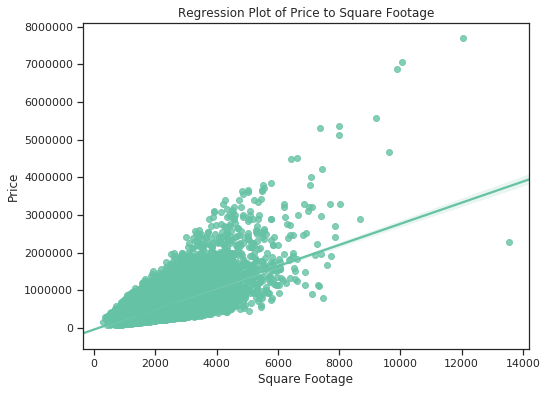

In [469]:
plt.figure(figsize=(8, 6))
sns.regplot(x="sqft_living", y="price", data=home)
plt.title("Regression Plot of Price to Square Footage")
plt.ylabel("Price")
plt.xlabel("Square Footage")

A residual plot shows increasing residuals with square footage, which confirms the curvature that we suspected. 

Text(0.5, 0, 'Square Footage')

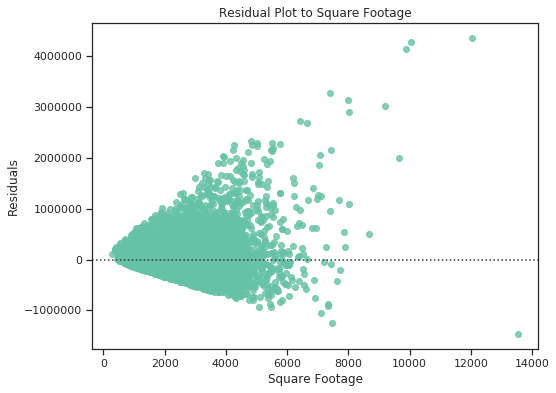

In [470]:
plt.figure(figsize=(8, 6))
sns.residplot(home['sqft_living'], home['price'])
plt.title("Residual Plot to Square Footage")
plt.ylabel("Residuals")
plt.xlabel("Square Footage")

Let's fit a simple linear regression on one variable: square footage.

In [471]:
# Create an object for LinearRegression()
lm = LinearRegression()

# Fit simple linear regression model
x = home[["sqft_living"]]
y = home["price"]
lm.fit(x,y)

# R-squared for model
lm.score(x,y)

0.49285321790379316

By calling the coefficient and intercept, we get the equation for our predicted home price (y_hat) as:

**y_hat = -43580.74 + 280.62 * sqft_living**

In [472]:
lm.coef_

array([280.6235679])

In [473]:
lm.intercept_

-43580.743094473844

Let's fit a multiple linear regression with 3 covariates: square footage, grade, and bathrooms. 

In [474]:
# Create an object for LinearRegression()
lm = LinearRegression()

# Fit multiple linear regression model
z = home[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'view', 'sqft_above', 'floors']]
y = home['price']
lm.fit(z,y)

# R-squared for model
lm.score(z,y)

0.5961100154730208

By calling the coefficients and intercept, we get the equation for our predicted home price (y_hat) as:

**y_hat = -493801.41 + 226.45 * sqft_living + 101280.27 * grade - 17630.07 * bathrooms - 29659.06 * bedrooms + 586514.09 * waterfront + 61743.91 * view - 43.47 * view - 10967.47 * floors**

We also see that our R-squared for the multiple regression, 0.596, is higher than that of our simple regression, 0.493. 

In [475]:
lm.coef_

array([ 2.26445784e+02,  1.01280270e+05, -1.76300716e+04, -2.96590583e+04,
        5.86514087e+05,  6.17439139e+04, -4.34747193e+01, -1.09674727e+04])

In [476]:
lm.intercept_

-493801.4098827684

Let's plot our predicted values from our multiple regression model against our actual observations. We see our fitted values (in blue) are fairly close to our actual values (in yellow). However, there is some room for improve looking at the peak and at home prices at the higher end. 

Text(0, 0.5, 'Proportion of homes')

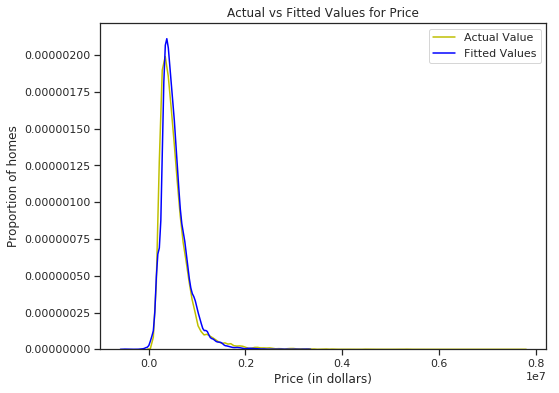

In [477]:
# Make the prediction with our multiple regression model
y_hat = lm.predict(z)

# Plot our fitted values from our model with actual observations
plt.figure(figsize=(8, 6))
ax1 = sns.distplot(home['price'], hist=False, color="y", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of homes')

## Part 3: Polynomial Regression on 1 variable

In [478]:
# Define function called PlotPoly to plot our polynomial regression
def PlotPoly(model, predictor, target, name):
    x_new = np.linspace(250, 14000, 100)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))
    plt.plot(predictor, target, '.', x_new, y_new, '-')
    plt.title('Polynomial Regression for Price vs. Square Footage')
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Home Price')
    plt.show()
    plt.close()

Let's fit a polynomial regression model with on variable: square footage. The equation we get is:

y_hat = 199200 + 67.99 * sqft_living + 0.03958 * sqft_living^2

In [479]:
# Set variables
x = home['sqft_living']
y = home['price']

# Fit polynomial regression model. We use 2nd order (quadaratic) due to the slight curvature indicated earlier 
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

         2
0.03858 x + 67.99 x + 1.992e+05


Let's call our function PlotPoly that we defined to plot our polynomial regression. It looks like the polynomial function performs a bit better than our linear model, expecially with higher square footage homes.  

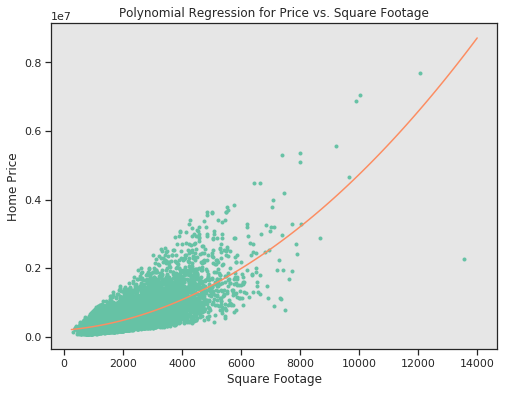

In [480]:
PlotPoly(p, x, y, 'Square Footage')

We can actually got to an extreme and fit a 13th order polynomial regression on square footage to see what happens. We see our complex equation below. While our fitted values almost perfectly match our observed values, the model is likely fitting noise (overfitting) and will fail to generalize, making it a poor model for making predictions (we'll see further below).  

           13             12             11             10
-3.51e-42 x  + 3.484e-37 x  - 1.454e-32 x  + 3.414e-28 x 
              9            8             7             6             5
 - 5.043e-24 x + 4.95e-20 x - 3.311e-16 x + 1.522e-12 x - 4.782e-09 x
              4           3         2
 + 1.007e-05 x - 0.01369 x + 11.23 x - 4761 x + 1.021e+06


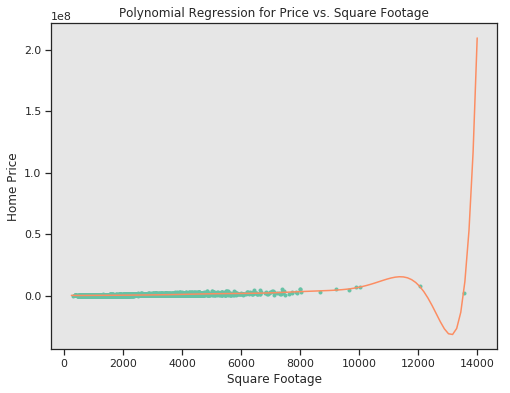

In [481]:
# To see an extreme, we fit 13th order polynomial on the variable square footage.
f1 = np.polyfit(x, y, 13)
p1 = np.poly1d(f1)
print(p1)
PlotPoly(p1,x,y, 'Square Footage')

## Part 4: Multivariate Polynomial Regression

Fitting a multivariate polynomial regression is a bit more complicated. We'll need to use PolynomialFeatures from scikit learn that we imported at the top. 

In [482]:
# Create object for Polynomial Features of 2nd degree
pr=PolynomialFeatures(degree=2)

Our original data includes 21,613 homes and 9 features

In [483]:
# Set variable to use
features = home[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'sqft_above', 'view', 'floors', 'sqft_basement']]
features.shape

(21613, 9)

In [484]:
# Polynomial transformation of our features
features_pr=pr.fit_transform(features)

Our transformed data has 21,613 homes and 55 features

In [485]:
features_pr.shape

(21613, 55)

We can improve our model by scaling our variables. Additionally, creating a data pipeline below can streamline the process, allowing us to scale, transform, and fit the model simultaneously. We use Pipeline and StandardScaler from scikit learn that we imported at the top. 

In [486]:
# Create pipeline using the name of the model and its constructor 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

When we scale, transform, and fit our model below, we get an R-squared for our multivariate polynomial model of 0.72.

In [487]:
# Scale, transform, and fit model simultaneously
pipe.fit(features_pr,y)
pipe.score(features_pr,y)

0.7225397043708288

## Part 5: In-Sample Model Evaluation

#### Simple Linear Regression

In [488]:
# Create an object for LinearRegression()
lm = LinearRegression()

# Fit simple linear regression model
x = home[["sqft_living"]]
y = home["price"]
lm.fit(x,y)

# R-squared for model
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.49285321790379316


In [489]:
# MSE of simple linear regression
y_hat_simple = lm.predict(x)
mse = mean_squared_error(home['price'], y_hat_simple)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  68351286833.039825


#### Multiple Linear Regression

In [490]:
# Create an object for LinearRegression()
lm = LinearRegression()

# Fit simple linear regression model
z = home[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'view', 'sqft_above', 'floors']]
y = home['price']
lm.fit(z,y)

# R-squared for model
print('The R-square is: ', lm.score(z, y))

The R-square is:  0.5961100154730208


In [491]:
# MSE of mutliple linear regression
y_hat_mult = lm.predict(z)
mse = mean_squared_error(home['price'], y_hat_mult)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  54434733998.092445


#### Multivariate Polynomial Regression

In [492]:
# R-squared for model (we also calculated this earlier simply with pipe.score)
predict_pipe=pipe.predict(features_pr)
predict_pipe[0:10]
r_squared = r2_score(y, predict_pipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.7225397043708288


In [493]:
# MSE for multivariate polynomial regression
mse = mean_squared_error(home['price'], predict_pipe)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  37395028265.66658


#### Select model for best in-sample fit

The multivariate polynomial model has the highest R-squared and the lowest MSE making it the best fit for the observed data. 

## Part 6: Training Linear and Polynomial Models (Out-of-Sample Evaluation)

To see how our models would perform in the real world, let's first split our data into training and test sets. 

In [494]:
# Create separate dataframes for x_data and y_data
x_data=home.drop('price',axis=1)
y_data = home['price']

In [495]:
# Split data into training and testing sets with 85% of data for training and 15% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


#### Multiple Linear Regression

In [634]:
# Training data variables that we'll use
x_train_data = x_train[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'view', 'sqft_above', 'floors']]

# Test data variables that we'll use
x_test_data = x_test[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'view', 'sqft_above', 'floors']]

In [621]:
# Create linear regression model
lr=LinearRegression()

# Train the model
lr.fit(x_train_data, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [623]:
# R-squared for training set
lr.score(x_train_data, y_train)

0.592660766778754

In [622]:
# R-squared for test set
lr.score(x_test_data, y_test)

0.6010428903935312

In [617]:
# Predicted values for training set
y_hat_train = lr.predict(x_train_data)
y_hat_train[0:9]

array([ 361806.42380183,  177362.9413339 ,  160398.83201203,
        354981.0619389 ,  377660.50929369, 1158086.45858853,
        513164.49709719,  924324.56999119,  393080.94643747])

In [618]:
# Predicted values for test set
y_hat_test = lr.predict(x_test_data)
y_hat_test[0:9]

array([735156.10511357, 386686.49655663, 939898.05299864, 648941.24785752,
       274202.51015211, 585768.47416188, 640171.84712626, 872888.76029606,
       372904.25699365])

Let's plot our actual values vs our predicted values for both the training (learning from training data) and test (encountering new data) sets. We see that for both the predicted values are fairly close to the actual values, with the training set performing slightly better. We see the most difference in home prices in the 500,000-600,000 dollar and 1-1.3 million dollar ranges. 

In [512]:
# Define function DistPlot
def DistPlot(YellowFunction, BlueFunction, YellowName, BlueName, Title):
    plt.figure(figsize=(8, 6))
    ax1 = sns.distplot(YellowFunction, hist=False, color="y", label=YellowName)
    sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Homes')
    plt.show()
    plt.close()

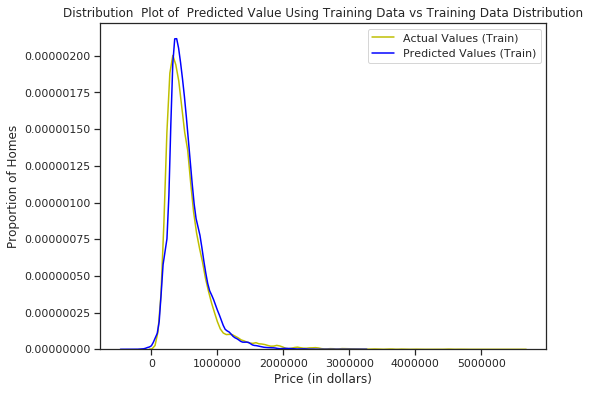

In [619]:
# Plot distribution of actual vs predicted for training set
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistPlot(y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

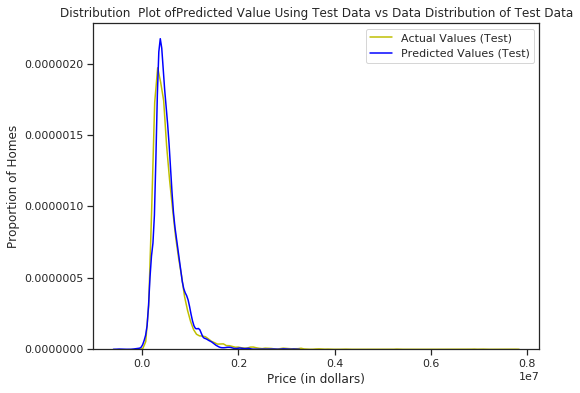

In [620]:
# Plot distribution of actual vs predicted for test set
Title='Distribution  Plot ofPredicted Value Using Test Data vs Data Distribution of Test Data'
DistPlot(y_test,y_hat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

#### Multivariate Polynomial Regression

In [508]:
# Create object for Polynomial Features of 2nd degree
pr=PolynomialFeatures(degree=2)

# Polynomial transform on training set
x_train_pr = pr.fit_transform(x_train[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'sqft_above', 'view', 'floors', 'sqft_basement']])
x_train_pr.shape

(18371, 55)

In [509]:
# Polynomial transform on test set
x_test_pr = pr.fit_transform(x_test[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'sqft_above', 'view', 'floors', 'sqft_basement']])
x_test_pr.shape

(3242, 55)

In [624]:
# Create linear regression poly
poly = LinearRegression()

# Train the model
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [519]:
# Predicted values for training set
y_hat_train = poly.predict(x_train_pr)
y_hat_train[0:10]

array([ 284848.04561156,  533151.5789706 ,  340892.37685271,
        729443.2645569 ,  509722.9201095 , 1358761.03149753,
        723922.22386859,  494121.96817573,  520738.02718332,
        505505.61422293])

In [518]:
# Predicted values for test set
y_hat_test = poly.predict(x_test_pr)
y_hat_test[0:10]

array([677282.07344623, 401447.46317254, 873982.96426214, 618679.27587962,
       386457.78983187, 518146.80552899, 527308.07851969, 790657.52759877,
       362276.18435846, 635235.40746646])

In [520]:
# R-squared for training set
poly.score(x_train_pr, y_train)

0.6684548209440676

In [522]:
# R-squared for test set
poly.score(x_test_pr, y_test)

0.6492060080623735

Let's plot our actual values vs our predicted values for both the training (learning from training data) and test (encountering new data) sets. The model is learning well from the training set. However, it doesn't perform as well when it encounters new data in the test set and we can see the large difference in predicted values vs actual values in the 500,000 to 700,000 dollar range. 

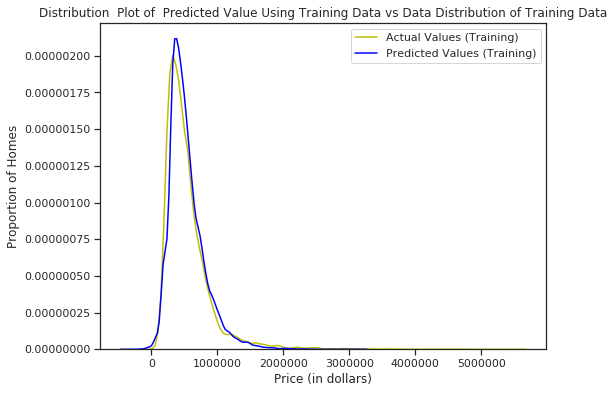

In [626]:
# Distribution plot of training data
Title='Distribution  Plot of  Predicted Value Using Training Data vs Data Distribution of Training Data'
DistPlot(y_train, y_hat_train, "Actual Values (Training)", "Predicted Values (Training)", Title)

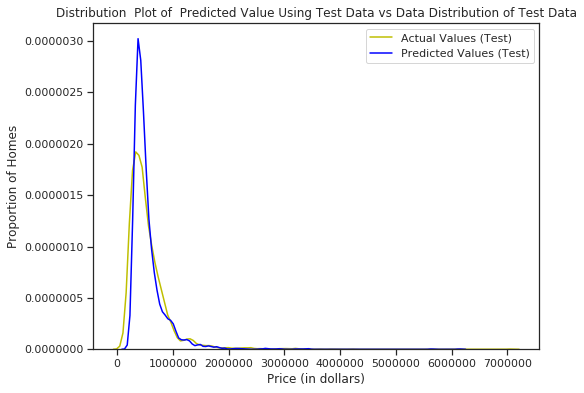

In [524]:
# Distribution plot of test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistPlot(y_test, y_hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

## Part 7: Overfitting

Let's take a look at overfitting. We got a glimpse of it earlier with our extereme 13th order polynomial model on square footage in which our model nearly perfectly fits observed data because it overfits, or fits noise, which makes it a poor model for making predictions or generalizing using new data. Let's see overfitting in action on training and test sets using a 9th order polynomial on square footage. 30% of our data will be used for the test set and the remaining 70% will be used for the training set. 

In [589]:
# Split data into training and testing sets with 70% of data for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 6484
number of training samples: 15129


In [607]:
pr = PolynomialFeatures(degree=9)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=9, include_bias=True, interaction_only=False)

In [614]:
# Create regression model poly
poly = LinearRegression()

# Train the model
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [610]:
y_hat = poly.predict(x_test_pr)
y_hat[0:9]

array([597988.10551897, 423803.42392374, 498774.83182497, 482237.21625759,
       417068.73121307, 477746.37482532, 559973.12123852, 914973.65318329,
       422552.23692295])

The R-squared of the training set is 0.5022.

In [611]:
poly.score(x_train_pr, y_train)

0.5021924280529926

The strong negative R-squared of the test set is a clear sign of overfitting. 

In [612]:
poly.score(x_test_pr, y_test)

-6988.96530108591

Let's plot the polynomial regression model. Yellow dots represent training data, blue dots represent test data, and the green line represents the model prediction. The predicted function, which is overfitted and tracks noise, doesn't track home price very well.

In [628]:
# Define function
def PolyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    plt.figure(figsize=(12, 10))
    x_max=max([x_train.values.max(), x_test.values.max()])
    x_min=min([x_train.values.min(), x_test.values.min()])
    x=np.arange(x_min, x_max, 0.1)
    plt.plot(x_train, y_train, 'yo', label='Training Data')
    plt.plot(x_test, y_test, 'bo', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.title('Predicted Function vs Training and Test Data')
    plt.xlabel('Square Footage')
    plt.ylim([0, 10000000])
    plt.ylabel('Price')
    plt.legend()

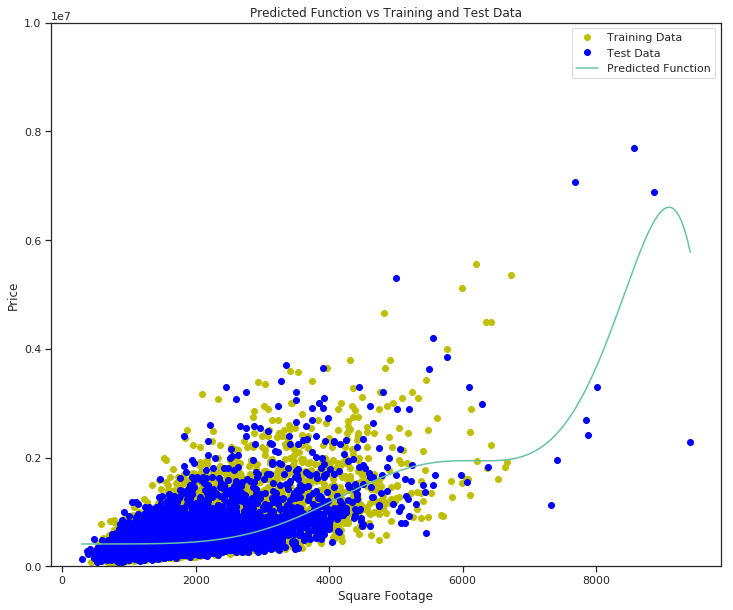

In [629]:
PolyPlot(x_train[['sqft_above']], x_test[['sqft_above']], y_train, y_test, poly, pr)

Let's run a test on R-squared values for varying orders of polynomial functions on square footage and plot the results. We see from our plot that after the 6th order polynomial, R-squared drops dramatically because the function fits noise rather than generalizing well when it encounters new data (test set).  

Text(5.9, 0.8, 'Maximum R^2 ')

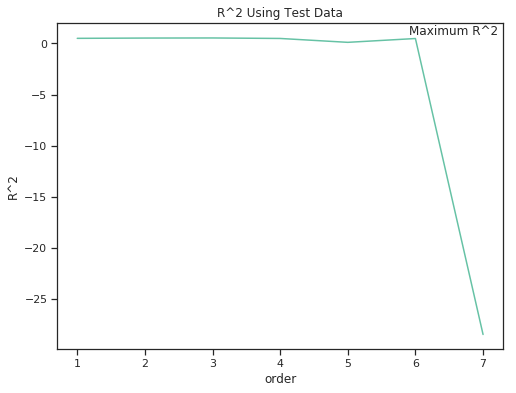

In [633]:
R_squared_test = []
order = [1, 2, 3, 4, 5, 6, 7]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    lr.fit(x_train_pr, y_train)
    R_squared_test.append(lr.score(x_test_pr, y_test))

plt.figure(figsize=(8, 6))    
plt.plot(order, R_squared_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(5.9, 0.8, 'Maximum R^2 ')    